<a href="https://colab.research.google.com/github/Alixandrini/ENGJ22/blob/main/aula4_MMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método dos Mínimos Quadrados - MMQ

Agora vamos voltar para nossas medidas geodésicas!
Primeiro observaremos um exemplo simples de medida linear feita a passos ($\textit{p}$), fita métrica($\textit{t}$) e distanciometro eletronico($\textit{e}$).

In [ ]:
import pandas as pd

In [ ]:
p=[568,565,566,568,569]
t=[567.17,567.08,567.12,567.38,567.01]
e=[567.133,567.124,567.129,567.165,567.114]
dic = {"passo(m)":p, "trena(m)":t, "EDM(m)":e}
dados = pd.DataFrame(data=dic)
dados   #Visualiza o DataFrame

,passo(m),trena(m),EDM(m)
0,568,567.17,567.133
1,565,567.08,567.124
2,566,567.12,567.129
3,568,567.38,567.165
4,569,567.01,567.114


In [ ]:
print("Estatísticas descritivas dos dados:")
dados['passo(m)'].describe()


Estatísticas descritivas dos dados:


count      5.000000
mean     567.200000
std        1.643168
min      565.000000
25%      566.000000
50%      568.000000
75%      568.000000
max      569.000000
Name: passo(m), dtype: float64

In [ ]:
dados['trena(m)'].describe()


count      5.00000
mean     567.15200
std        0.14025
min      567.01000
25%      567.08000
50%      567.12000
75%      567.17000
max      567.38000
Name: trena(m), dtype: float64

In [ ]:
dados['EDM(m)'].describe()

count      5.000000
mean     567.133000
std        0.019248
min      567.114000
25%      567.124000
50%      567.129000
75%      567.133000
max      567.165000
Name: EDM(m), dtype: float64

Agora imagine que recebemos medidas de uma sonda de nível de água colocada em um lago que realizou ao longo de um dia 60 medidas. E gostariamos de avaliar o nivel desse lago sabendo que a sonda é influenciada por ventos mais fortes no final do dia. Como é possível sustentar essa afirmativa com base nas medidas apresentadas abaixo:

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot

In [ ]:
nivel=[]
horario=[]
with open('C:/Users/alixa/Documents/ENGJ22 - Ajustamento de Observações Geodésicas B/CO-OPS_9416841_wl.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    headers = next(csvReader)
    for row in csvReader:
        horario.append((row[1]))
        nivel.append((row[2]))

In [ ]:
dados=pd.read_csv('CO-OPS_9416841_wl.csv')

In [ ]:
tempo=dados.iloc[0:500,1]
nivel=dados.iloc[0:500,2]


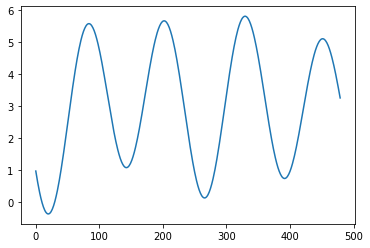

In [ ]:
# Assim se faz um comentário em Pyhton
matplotlib.pyplot.plot( nivel)
matplotlib.pyplot.show()

#### Questionário:

1) Quais são os tipos de erros e as magnitudes desses erros envolvidos em cada uma das medidas? <br><br>
Resposta: os erros são :
<br>
* primeiro erro
* segundo erro
<br>

2) Em que parametro da estátistica das medidas de distancia do exemplo anterior podemos observar a influencia dos erros listados na resposta da pergunta anterior?<br><br>
3) Liste dois exemplos de medidas geodésicas onde lançamos mão da redundancia de observações para o controle de erros?<br><br>
4) Liste métodos diretos e indiretos de medida dentro da Eng. de Agrimensura e Cartográfica.<br><br>

In [ ]:
import numpy as np

A=np.matrix([[1,0,0],
             [0,1,0],
             [0,0,1],
             [1,1,0],
             [0,1,1]])
P=np.eye(5)
Lb=np.matrix([[100],
              [100],
              [100.08],
              [200.04],
              [200]])

In [ ]:
ATA=np.linalg.inv(np.dot(np.dot(A.T,P),A))
ATL=np.dot(np.dot(A.T,P),Lb)
Xa=np.dot(ATA,ATL)
print(Xa)

[[100.025]
 [ 99.99 ]
 [100.045]]


In [ ]:
Xa=np.linalg.inv(A.T*P*A)*(A.T*P*Lb)
print(Xa)

[[100.025]
 [ 99.99 ]
 [100.045]]


In [ ]:
V=A*Xa-Lb
print(V)

[[ 0.025]
 [-0.01 ]
 [-0.035]
 [-0.025]
 [ 0.035]]
